/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


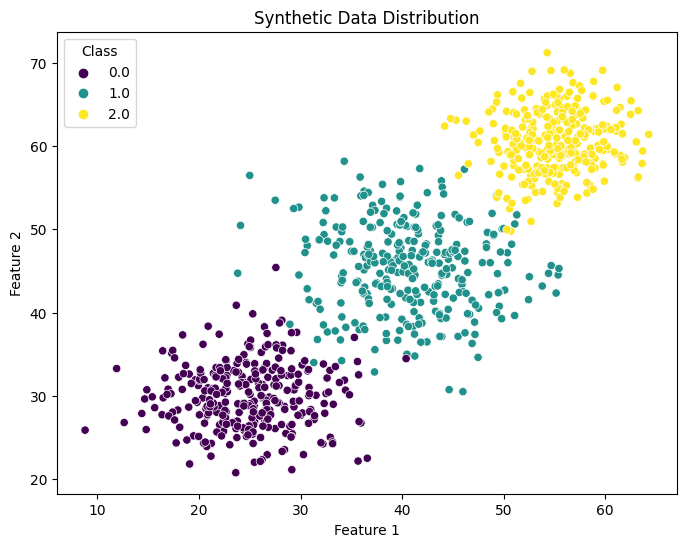

Model saved to trained_model.joblib
Model loaded from trained_model.joblib


/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


NameError: name 'xx' is not defined

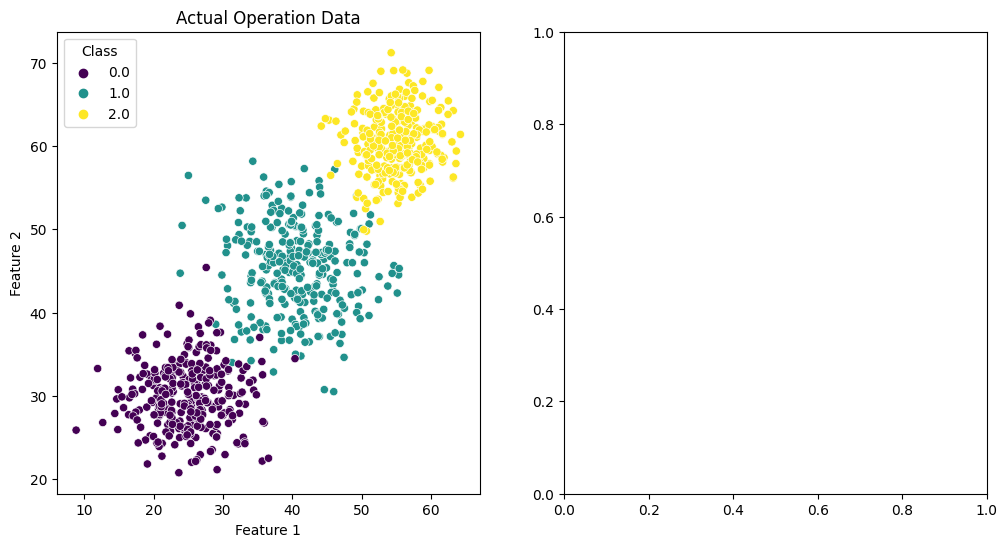

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define classes and their properties with more meaningful names
class_properties = {
    0: {'mean': [25, 30], 'std': [5, 4]},
    1: {'mean': [40, 45], 'std': [6, 5]},
    2: {'mean': [55, 60], 'std': [4, 3.5]}
}

# Generate synthetic data for a classification task
samples_per_class = 300
num_dimensions = 2
num_classes = len(class_properties)

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(samples_per_class, num_dimensions))
    labels = np.full((samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame with more meaningful column names
column_names = [f'Feature_{i+1}' for i in range(num_dimensions)] + ['Class']
df = pd.DataFrame(data, columns=column_names)

# Visualization of Synthetic Data during EDA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis')
plt.title('Synthetic Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "trained_model.joblib"
joblib.dump(clf, model_filename)
print(f"Model saved to {model_filename}")

# Load the saved model
loaded_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# Visualization of Decision Boundaries
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis')
plt.title('Actual Operation Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundaries
plt.subplot(1, 2, 2)
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = loaded_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis', alpha=0.5)
plt.title('Decision Boundaries and Operation Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Class')

plt.show()

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot actual and predicted data points with more meaningful plot titles
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis')
plt.title('Actual Operation Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot predicted data points
plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis', alpha=0.5)
sns.scatterplot(x=X_test['Feature_1'], y=X_test['Feature_2'], hue=y_pred, marker='X', s=100, palette='Set2', edgecolor='black')
plt.title('Actual vs Predicted Operation Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()
